In [1]:
import numpy
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import matplotlib.pyplot as plt
import keras
import keras.backend as K
from keras.callbacks import LambdaCallback
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from matplotlib import pyplot
import warnings
from scipy.ndimage import rotate
from scipy.misc import face
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
def imgaugment(angle):
    
    for i in range(0,60000):
    #anticlockwise rotation
        rot = rotate(X_train[i], angle=angle, reshape=False)

        #left shift
        for k in range(14,17):
            temp=rot[k][0]
            for l in range(27):
                rot[k][l]=rot[k][l+1]
            rot[k][27]=temp
        #right shift    
        for k in range(22,25):
            temp=rot[k][27]
            for l in range(27):
                rot[k][27-l]=rot[k][27-l-1]
            rot[k][0]=temp
        #top shift    
        for k in range(17,20):
            temp=rot[0][k]
            for l in range(27):
                rot[l][k]=rot[l+1][k]
            rot[27][k]=temp
        #bottom shift    
        for k in range(14,17):
            temp=rot[27][k]
            for l in range(27):
                rot[27-l][k]=rot[27-l-1][k]
            rot[0][k]=temp

        #second diagonal shift left
        b=[]
        for i in range(0,28):
            b.append(rot[27-i][i])

        temp=b[0]

        for i in range(0,5):
            b[i]=b[i+1]
        b[5]=temp

        for i in range(0,28):
            rot[27-i][i]=b[i]

        #first diagonal shift left
        c=[]

        for i in range(0,28):
            c.append(rot[i][i])


        temp=c[0]
        for i in range(0,27):
            c[i]=c[i+1]
        c[27]=temp


        for i in range(0,28):
            rot[i][i]=c[i]

        #second diagonal shift right
        temp=b[27]
        for i in range(0,27):
            b[27-i]=b[27-i-1]
        b[0]=temp


        for i in range(0,28):
            rot[27-i][i]=b[i]

        #first diagonal rotation right

        temp=c[27]
        for i in range(0,27):
            c[27-i]=c[27-i-1]
        c[0]=temp


        for i in range(0,28):
            rot[i][i]=c[i]


        #plt.imshow(rot.reshape(28,28))

        #plt.show()
        X_train[i]=rot[i]


    for i in range(0,10000):

        rot1 = rotate(X_test[i], angle=angle, reshape=False)

        #left shift
        for k in range(22,25):
            temp=rot1[k][0]
            for l in range(27):
                rot1[k][l]=rot1[k][l+1]
            rot1[k][27]=temp
        #right shift    
        for k in range(22,25):
            temp=rot1[k][27]
            for l in range(27):
                rot1[k][27-l]=rot1[k][27-l-1]
            rot1[k][0]=temp
        #top shift    
        for k in range(22,25):
            temp=rot1[0][k]
            for l in range(27):
                rot1[l][k]=rot1[l+1][k]
            rot1[27][k]=temp
        #bottom shift    
        for k in range(22,25):
            temp=rot1[27][k]
            for l in range(27):
                rot1[27-l][k]=rot1[27-l-1][k]
            rot1[0][k]=temp

        #second diagonal shift left
        b=[]
        for i in range(0,28):
            b.append(rot1[27-i][i])

        temp=b[0]

        for i in range(0,5):
            b[i]=b[i+1]
        b[5]=temp

        for i in range(0,28):
            rot1[27-i][i]=b[i]

        #second diagonal shift right
        temp=b[27]
        for i in range(0,27):
            b[27-i]=b[27-i-1]
        b[0]=temp


        for i in range(0,28):
            rot1[27-i][i]=b[i]

        #first diagonal shift left
        c=[]

        for i in range(0,28):
            c.append(rot1[i][i])


        temp=c[0]
        for i in range(0,27):
            c[i]=c[i+1]
        c[27]=temp


        for i in range(0,28):
            rot1[i][i]=c[i]

        #first diagonal shift right

        temp=c[27]
        for i in range(0,27):
            c[27-i]=c[27-i-1]
        c[0]=temp


        for i in range(0,28):
            rot1[i][i]=c[i]


        #plt.imshow(rot1.reshape(28,28))

        #plt.show()
        X_test[i]=rot1[i]

In [4]:
imgaugment(3)
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [5]:


X_train = X_train / 255
X_test = X_test / 255
K.set_image_dim_ordering('th')



In [6]:
## Taking 1000 training and testing images
X_0=X_train[y_train[:,]==0]
X0=X_0[:100]

X_1=X_train[y_train[:,]==1]
X1=X_1[:100]

X_2=X_train[y_train[:,]==2]
X2=X_2[:100]

X_3=X_train[y_train[:,]==3]
X3=X_3[:100]

X_4=X_train[y_train[:,]==4]
X4=X_4[:100]

X_5=X_train[y_train[:,]==5]
X5=X_5[:100]

X_6=X_train[y_train[:,]==6]
X6=X_6[:100]

X_7=X_train[y_train[:,]==7]
X7=X_7[:100]

X_8=X_train[y_train[:,]==8]
X8=X_8[:100]

X_9=X_train[y_train[:,]==9]
X9=X_9[:100]

# Test data

X_0t=X_test[y_test[:,]==0]
X0t=X_0t[:100]

X_1t=X_test[y_test[:,]==1]
X1t=X_1t[:100]

X_2t=X_test[y_test[:,]==2]
X2t=X_2t[:100]

X_3t=X_test[y_test[:,]==3]
X3t=X_3t[:100]

X_4t=X_test[y_test[:,]==4]
X4t=X_4t[:100]

X_5t=X_test[y_test[:,]==5]
X5t=X_5t[:100]

X_6t=X_test[y_test[:,]==6]
X6t=X_6t[:100]

X_7t=X_test[y_test[:,]==7]
X7t=X_7t[:100]

X_8t=X_test[y_test[:,]==8]
X8t=X_8t[:100]

X_9t=X_test[y_test[:,]==9]
X9t=X_9t[:100]

X_train=np.concatenate((X0,X1,X2,X3,X4,X5,X6,X7,X8,X9))
X_test=np.concatenate((X0t,X1t,X2t,X3t,X4t,X5t,X6t,X7t,X8t,X9t))

In [7]:
y_train=np.zeros(1000,)
y_test=np.zeros(1000,)
for i in range(0,10):
    for j in range(0,100):
        y_test[(100*i)+j,]=i
        
for i in range(0,10):
    for j in range(0,100):
        y_train[(100*i)+j,]=i

In [8]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [9]:
# ## ===== Data augmentation ==== ##
# datagen = ImageDataGenerator(rotation_range=3)
# datagen.fit(X_train)
y_train.shape

(1000, 10)

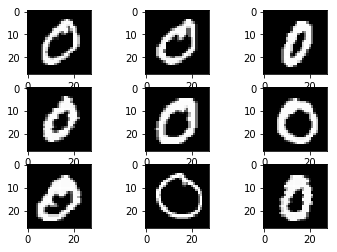

In [10]:
# for X_batch, y_batch in X_train, y_train:
#     # create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()
#break

In [11]:
def task3_1():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def task3_2():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [12]:
model1= task3_1()
history1=model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 1000 samples, validate on 1000 samples
Epoch 1/10
 - 1s - loss: 2.0433 - acc: 0.4710 - val_loss: 1.6345 - val_acc: 0.6820
Epoch 2/10
 - 1s - loss: 1.2486 - acc: 0.7710 - val_loss: 1.0255 - val_acc: 0.7170
Epoch 3/10
 - 0s - loss: 0.7199 - acc: 0.8250 - val_loss: 0.7425 - val_acc: 0.7780
Epoch 4/10
 - 0s - loss: 0.4892 - acc: 0.8580 - val_loss: 0.5848 - val_acc: 0.8000
Epoch 5/10
 - 0s - loss: 0.3903 - acc: 0.8770 - val_loss: 0.5162 - val_acc: 0.8310
Epoch 6/10
 - 0s - loss: 0.3354 - acc: 0.9010 - val_loss: 0.4526 - val_acc: 0.8530
Epoch 7/10
 - 0s - loss: 0.2622 - acc: 0.9350 - val_loss: 0.4264 - val_acc: 0.8580
Epoch 8/10
 - 0s - loss: 0.2308 - acc: 0.9320 - val_loss: 0.3864 - val_acc: 0.8780
Epoch 9/10
 - 0s - loss: 0.1965 - acc: 0.9490 - val_loss: 0.3893 - val_acc: 0.8710
Epoch 10/10
 - 0s - loss: 0.1710 - acc: 0.9590 - val_loss: 0.3782 - val_acc: 0.8710


In [13]:
#===== With Dropout ====#
model2= task3_2()
history2=model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 1000 samples, validate on 1000 samples
Epoch 1/10
 - 1s - loss: 2.0235 - acc: 0.4550 - val_loss: 1.5990 - val_acc: 0.6790
Epoch 2/10
 - 1s - loss: 1.2040 - acc: 0.7930 - val_loss: 1.0053 - val_acc: 0.7360
Epoch 3/10
 - 1s - loss: 0.6839 - acc: 0.8360 - val_loss: 0.7154 - val_acc: 0.7830
Epoch 4/10
 - 1s - loss: 0.4800 - acc: 0.8590 - val_loss: 0.5755 - val_acc: 0.8120
Epoch 5/10
 - 1s - loss: 0.3797 - acc: 0.8900 - val_loss: 0.4994 - val_acc: 0.8320
Epoch 6/10
 - 1s - loss: 0.3245 - acc: 0.8960 - val_loss: 0.4603 - val_acc: 0.8480
Epoch 7/10
 - 1s - loss: 0.2834 - acc: 0.9210 - val_loss: 0.4123 - val_acc: 0.8620
Epoch 8/10
 - 1s - loss: 0.2399 - acc: 0.9350 - val_loss: 0.4045 - val_acc: 0.8650
Epoch 9/10
 - 1s - loss: 0.1987 - acc: 0.9450 - val_loss: 0.3823 - val_acc: 0.8690
Epoch 10/10
 - 1s - loss: 0.1794 - acc: 0.9540 - val_loss: 0.3783 - val_acc: 0.8690
